# TSEN-based visualization to assist human experts identify clusters 

In [1]:
import torch
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.manifold import TSNE

# Generate data x = x1, x2, ..., x6 

In [2]:
n_data = torch.ones(100, 1) # [1, 1, 1, ...,1]

In [3]:
x11 = torch.normal(-3*n_data, 2)
x12 = torch.normal(-3*n_data, 2)
x21 = torch.normal(3*n_data, 2)
x22 = torch.normal(3*n_data, 2)
x31 = torch.normal(0*n_data, 1)
x32 = torch.normal(0*n_data, 1)
x41 = torch.normal(-2*n_data, 1)
x42 = torch.normal(n_data, 1)
x51 = torch.normal(0*n_data, 1)
x52 = torch.normal(2*n_data, 1)
x61 = torch.normal(0*n_data, 1)
x62 = torch.normal(-2*n_data, 1)

In [4]:
x1=torch.cat((x11, x12), 1)
x2=torch.cat((x21, x22), 1)
x3=torch.cat((x31, x32), 1)
x4=torch.cat((x41, x42), 1)
x5=torch.cat((x51, x52), 1)
x6=torch.cat((x61, x62), 1)

In [5]:
x = torch.cat((x1, x2), 0)
x = torch.cat((x, x3), 0)
x = torch.cat((x, x4), 0)
x = torch.cat((x, x5), 0)
x = torch.cat((x, x6), 0).type(torch.FloatTensor)

# Use TSEN to genrate different cluster visualizations and let human experts  identify best solutions

### Please read https://distill.pub/2016/misread-tsne/  to see how to adjust parameters for different types of input data

###  1. perplexity   

Try perplexity = 2,  5,  30,  50,  100,  

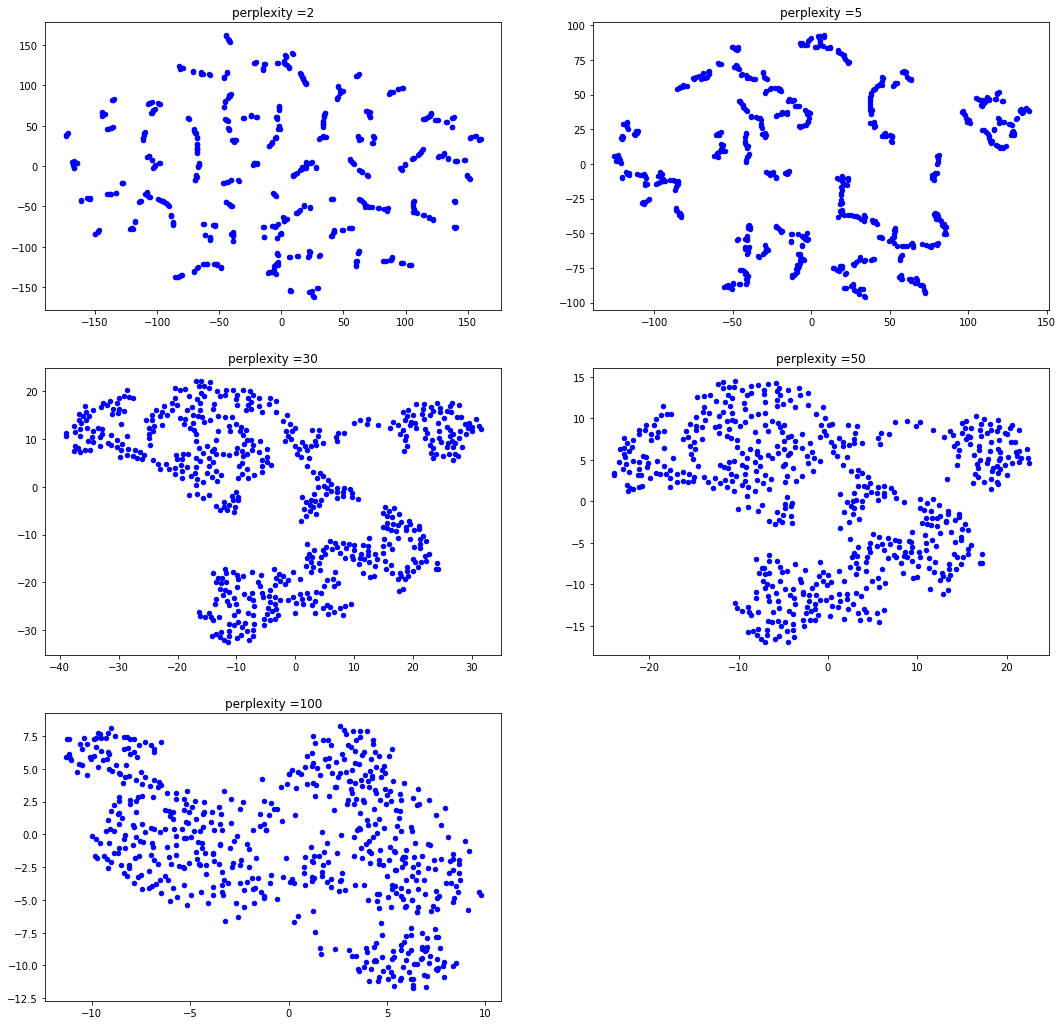

In [6]:
i = 1
fig = plt.figure(figsize=(18, 18)) # 18x9 inches to fit 3 rows * 2 columns subplots
lst = [2, 5, 30, 50, 100]
print('Try perplexity = ', end = '')
for n in lst:
    print(n, end = ',  ')
    tsne = TSNE(perplexity=n, n_components=2, init='pca', n_iter=5000)
    x1 = tsne.fit_transform(x.numpy())
    a=fig.add_subplot(3,2, i) # we have a 3 rows * 2 columns subplots
    plt.scatter(x1[:, 0], x1[:, 1], s=20, c='blue')
    title = 'perplexity =' + str(n)
    plt.title(title)
    i=i+1
plt.show()

###  2. try Initialization of embedding =  ‘random’ or ‘pca’, 

Try perplexity = 2 pca ,random ,5 pca ,random ,30 pca ,random ,50 pca ,random ,100 pca ,random ,

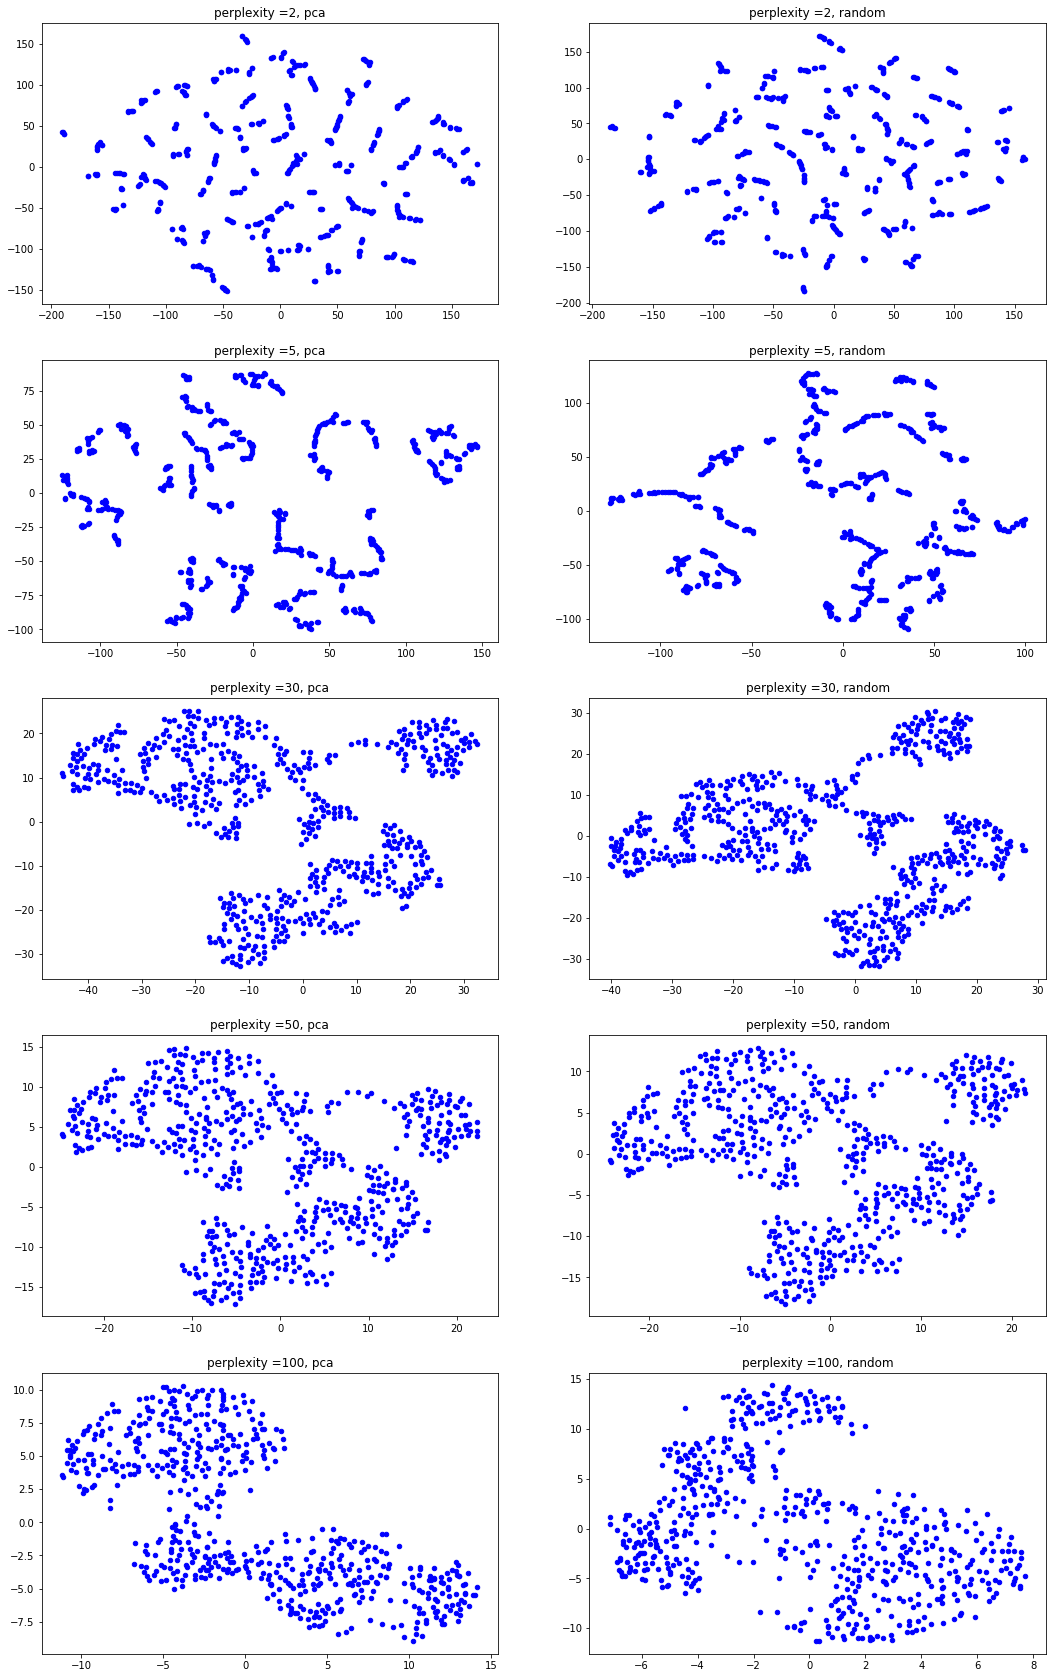

In [7]:
i = 1
fig = plt.figure(figsize=(18, 30)) # 18x30 inches to fit 5 rows * 2 columns subplots
lst1 = [2, 5, 30, 50, 100]
lst2 = ['pca', 'random']
print('Try perplexity = ', end = '')
for n in lst1:
    print(n, end = ' ')
    for init_method in lst2:
        print(init_method, end = ' ,')
        tsne = TSNE(perplexity=n, n_components=2, init=init_method, n_iter=5000)
        x1 = tsne.fit_transform(x.numpy())
        a=fig.add_subplot(5, 2, i) # we have a 5 rows * 2 columns subplots
        plt.scatter(x1[:, 0], x1[:, 1], s=20, c='blue')
        title = 'perplexity =' + str(n) + ', ' + init_method
        plt.title(title)
        i=i+1
plt.show()